Actividad integradora 2 - Parte 1: Redes de conectividad en el cerebro humano

Equipo 5
Erick Eduardo Orozco Reyes - A01198247
Herbert Eduardo Euroza Hernández - A01635175
Carlos Dhali Tejeda Tapia - A00344820

Librerias que se usarán a lo largo del proyecto

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from queue import Queue
from queue import LifoQueue
from queue import PriorityQueue

import networkx as nx
import math
from math import atan2

import matplotlib as mpl
import matplotlib.cm as cm

from scipy.spatial import Voronoi, voronoi_plot_2d

Clases Generales (Se usaran en la mayoria del proyecto).

In [2]:
import numpy as np
def dist(xA, yA, zA, xB, yB, zB):
    punto1 = np.array([xA, yA, zA])
    punto2 = np.array([xB, yB, zB])
    dist = np.linalg.norm(punto2 - punto1)
    return dist
class WeightedGraph:
    _directed = True
    _adjacency_list = {}  # Lista de adyacencia

    def __init__(self, directed: bool = False):
        # Inicialización de un grafo ponderado
        self._directed = directed
        self._adjacency_list = {}

    def clear(self):
        # Elimina todos los vértices y aristas del grafo
        self._adjacency_list = {}

    def number_of_vertices(self):
        # Devuelve el número de vértices en el grafo
        return len(self._adjacency_list)

    def vertices(self):
        # Devuelve una lista de vértices en el grafo
        return list(self._adjacency_list.keys())

    def edges(self):
        # Devuelve una lista de aristas en el grafo con pesos
        edges = []
        for v in self._adjacency_list:
            for neighbor, weight in self._adjacency_list[v]:
                if self._directed or (neighbor, v, weight) not in edges:
                    edges.append((v, neighbor, weight))
        return edges

    def add_vertex(self, v):
        # Añade un vértice al grafo si no existe ya
        if v not in self._adjacency_list:
            self._adjacency_list[v] = []

    def remove_vertex(self, v):
        # Elimina un vértice y sus aristas asociadas del grafo
        if v in self._adjacency_list:
            del self._adjacency_list[v]
            for vertex in self._adjacency_list:
                self._adjacency_list[vertex] = [(u, w) for u, w in self._adjacency_list[vertex] if u != v]

    def add_edge(self, v1, v2, e=0):
        # Añade una arista ponderada al grafo
        if v1 in self._adjacency_list and v2 in self._adjacency_list:
            if (v2, e) not in self._adjacency_list[v1]:
                self._adjacency_list[v1].append((v2, e))
                if not self._directed:
                    self._adjacency_list[v2].append((v1, e))

    def remove_edge(self, v1, v2, e):
        # Elimina una arista ponderada del grafo
        if v1 in self._adjacency_list and v2 in self._adjacency_list:
            self._adjacency_list[v1] = [(u, w) for u, w in self._adjacency_list[v1] if u != v2 or w != e]
            if not self._directed:
                self._adjacency_list[v2] = [(u, w) for u, w in self._adjacency_list[v2] if u != v1 or w != e]

    def adjacent_vertices(self, v):
        # Devuelve una lista de vértices adyacentes a un vértice dado
        return self._adjacency_list.get(v, [])

    def is_adjacent(self, v1, v2) -> bool:
        # Verifica si dos vértices son adyacentes
        return any(u == v2 for u, _ in self._adjacency_list.get(v1, []))

    def graficasGraph(self, matrix_file, coordinates_file):
        # Carga datos desde archivos, construye y muestra el grafo
        matrix, coordinates = self.load_data(matrix_file, coordinates_file)
        self.build_graph(matrix, coordinates)
        self.print_graph()

    def load_data(self, matrix_file, coordinates_file):
        # Carga matrices y coordenadas desde archivos
        matrix = np.loadtxt(matrix_file, dtype=int)
        coordinates = np.loadtxt(coordinates_file, dtype=str)
        return matrix, coordinates

    def build_graph(self, matrix, coordinates):
        # Construye el grafo a partir de matrices y coordenadas
        for i in range(len(coordinates)):
            self.add_vertex(coordinates[i][0])

        for i in range(len(coordinates)):
            for x in range(len(matrix[i])):
                if matrix[i][x] == 1 and not self.is_adjacent(coordinates[i][0], coordinates[x][0]):
                    cost = dist(float(coordinates[i][1]), float(coordinates[i][2]), float(coordinates[i][3]),
                                float(coordinates[x][1]), float(coordinates[x][2]), float(coordinates[x][3]))
                    self.add_edge(coordinates[i][0], coordinates[x][0], cost)

    def print_graph(self):
        # Imprime la representación del grafo con pesos
        for vertex in self._adjacency_list:
            for neighbor, weight in self._adjacency_list[vertex]:
                print(vertex, " -> ", neighbor, " weight: ", weight)

# Definición de la clase TreeNode
class TreeNode:
    def __init__(self, parent, v, c):
        # Inicializa un nodo del árbol con un padre, un vértice y un costo
        self.parent = parent
        self.v = v
        self.c = c

    def path(self):
        # Devuelve el camino desde la raíz hasta este nodo
        node = self
        path = []
        while node is not None:
            path.insert(0, node.v)
            node = node.parent
        return path

    def __lt__(self, other):
        # Compara dos nodos del árbol por sus costos
        return self.c < other.c

# Definición de la clase GraphFloyd
class GraphFloyd:
    def __init__(self, directed: bool = False):
        # Inicialización de un grafo para el algoritmo de Floyd
        self._directed = directed
        self._vertices = []
        self._adjacency_matrix = []

    def add_vertex(self, v):
        # Añade un vértice al grafo si no existe ya
        if v not in self._vertices:
            self._vertices.append(v)
            n = len(self._vertices)
            if n > 1:
                for vertex in self._adjacency_matrix:
                    vertex.append(0)
            self._adjacency_matrix.append(n * [0])

    def remove_vertex(self, v):
        # Elimina un vértice y sus aristas asociadas del grafo
        if v in self._vertices:
            index = self._vertices.index(v)
            self._vertices.pop(index)
            for row in self._adjacency_matrix:
                row.pop(index)
            self._adjacency_matrix.pop(index)

    def add_edge(self, v1, v2, e=0):
        # Añade una arista ponderada al grafo
        if v1 in self._vertices and v2 in self._vertices:
            index1 = self._vertices.index(v1)
            index2 = self._vertices.index(v2)
            self._adjacency_matrix[index1][index2] = e
            if not self._directed:
                self._adjacency_matrix[index2][index1] = e

    def remove_edge(self, v1, v2):
        # Elimina una arista ponderada del grafo
        if v1 in self._vertices and v2 in self._vertices:
            index1 = self._vertices.index(v1)
            index2 = self._vertices.index(v2)
            self._adjacency_matrix[index1][index2] = 0
            if not self._directed:
                self._adjacency_matrix[index2][index1] = 0

    def is_adjacent(self, v1, v2) -> bool:
        # Verifica si dos vértices son adyacentes
        if v1 in self._vertices and v2 in self._vertices:
            i = self._vertices.index(v1)
            j = self._vertices.index(v2)
            return self._adjacency_matrix[i][j] != 0
        return False

    def graficasGraph(self, matrix_file, coordinates_file):
        # Carga datos desde archivos, construye y muestra el grafo
        matrix, coordinates = self.load_data(matrix_file, coordinates_file)
        self.build_graph(matrix, coordinates)
        self.print_graph()

    def load_data(self, matrix_file, coordinates_file):
        # Carga matrices y coordenadas desde archivos
        matrix = np.loadtxt(matrix_file, dtype=int)
        coordinates = np.loadtxt(coordinates_file, dtype=str)
        return matrix, coordinates

    def build_graph(self, matrix, coordinates):
        # Construye el grafo a partir de matrices y coordenadas
        for i in range(len(coordinates)):
            self.add_vertex(coordinates[i][0])

        for i in range(len(coordinates)):
            for x in range(len(matrix[i])):
                if matrix[i][x] == 1 and not self.is_adjacent(coordinates[i][0], coordinates[x][0]):
                    cost = dist(float(coordinates[i][1]), float(coordinates[i][2]), float(coordinates[i][3]),
                                float(coordinates[x][1]), float(coordinates[x][2]), float(coordinates[x][3]))
                    self.add_edge(coordinates[i][0], coordinates[x][0], cost)

    def print_graph(self):
        # Imprime la representación del grafo con pesos
        n = len(self._vertices)
        for i in range(n):
            for j in range(n):
                if self._adjacency_matrix[i][j] != 0:
                    print(self._vertices[i], " -> ", self._vertices[j], " edge weight: ", self._adjacency_matrix[i][j])



Funciones de gráficación

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def convertir_3d_a_2d(points3D):
    # Convierte coordenadas 3D a proyecciones 2D
    r = np.sqrt(points3D[:, 0]**2 + points3D[:, 1]**2 + points3D[:, 2]**2)
    t = r / (r + points3D[:, 2])
    x = r * points3D[:, 0]
    y = r * points3D[:, 1]
    return np.column_stack((x, y))

def graficar_puntos_2d(points2D, channels):
    # Grafica puntos 2D y etiquetas de canales en un círculo unitario
    circle = plt.Circle((0, 0), 1, color='r', alpha=0.25, fill=False)
    plt.scatter(points2D[:, 0], points2D[:, 1])
    plt.gca().add_patch(circle)

    for i in range(len(points2D)):
        plt.text(points2D[i, 0] - 0.02, points2D[i, 1] + 0.025, channels[i])

def graficar_aristas_2d(points2D, channels, graph):
    # Grafica las aristas entre puntos 2D según la información del grafo
    for vertex in channels:
        neighbors = graph.adjacent_vertices(vertex)
        if len(neighbors) == 0:
            continue
        for neighbor, weight in neighbors:
            v_index = channels.index(vertex)
            n_index = channels.index(neighbor)
            plt.plot([points2D[v_index, 0], points2D[n_index, 0]],
                     [points2D[v_index, 1], points2D[n_index, 1]],
                     color='red', linestyle='--', linewidth=2)

def generar_puntos_3d(conjunto_electrodos="8"):
    """
    Genera puntos 3D para electrodos.

    :param conjunto_electrodos: Una cadena que especifica el conjunto de electrodos ("8" o "32").
    :return: Un array de NumPy que contiene los puntos 3D.
    """
    # Define las coordenadas 3D para los electrodos (conjunto de 8 o 32)
    if conjunto_electrodos == "8":
        return np.array([[0, 0.71934, 0.694658],
                         [-0.71934, 0, 0.694658],
                         [0, 0, 1],
                         [0.71934, 0, 0.694658],
                         [0, -0.71934, 0.694658],
                         [-0.587427, -0.808524, -0.0348995],
                         [0, -0.999391, -0.0348995],
                         [0.587427, -0.808524, -0.0348995]])
    elif conjunto_electrodos == "32":
        return np.array([[-0.308829, 0.950477, -0.0348995],
                     [0.308829, 0.950477, -0.0348995],
                     [-0.406247, 0.871199, 0.275637],
                     [0.406247, 0.871199, 0.275637],
                     [-0.808524, 0.587427, -0.0348995],
                     [-0.545007, 0.673028, 0.5],
                     [0, 0.71934, 0.694658],
                     [0.545007, 0.673028, 0.5],
                     [0.808524, 0.587427, -0.0348995],
                     [-0.887888, 0.340828, 0.309017],
                     [-0.37471, 0.37471, 0.848048],
                     [0.37471, 0.37471, 0.848048],
                     [0.887888, 0.340828, 0.309017],
                     [-0.999391, 0, -0.0348995],
                     [-0.71934, 0, 0.694658],
                     [0, 0, 1],
                     [0.71934, 0, 0.694658],
                     [0.999391, 0, -0.0348995],
                     [-0.887888, -0.340828, 0.309017],
                     [-0.37471, -0.37471, 0.848048],
                     [0.37471, -0.37471, 0.848048],
                     [0.887888, -0.340828, 0.309017],
                     [-0.808524, -0.587427, -0.0348995],
                     [-0.545007, -0.673028, 0.5],
                     [0, -0.71934, 0.694658],
                     [0.545007, -0.673028, 0.5],
                     [0.808524, -0.587427, -0.0348995],
                     [-0.406247, -0.871199, 0.275637],
                     [0.406247, -0.871199, 0.275637],
                     [-0.308829, -0.950477, -0.0348995],
                     [0, -0.999391, -0.0348995],
                     [0.308829, -0.950477, -0.0348995]])

def graficarGrafos(conjunto_electrodos="8", grafica=WeightedGraph):
    """
    Grafica la representación 2D de los puntos de electrodos y las aristas en el grafo.

    :param conjunto_electrodos: Una cadena que especifica el conjunto de electrodos ("8" o "32").
    :param grafica: Una instancia de la clase WeightedGraph.
    """
    if conjunto_electrodos not in ["8", "32"]:
        print("Error: El conjunto de electrodos debe ser '8' o '32'")
        return

    # Definir nombres de canales para el conjunto de 8 o 32 electrodos
    canales_8 = ['Fz', 'C3', 'Cz', 'C4', 'Pz', 'PO7', 'Oz', 'PO8']
    canales_32 = ['Fp1', 'Fp2', 'AF3', 'AF4', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'T7', 'C3', 'Cz',
                  'C4', 'T8', 'CP5', 'CP1', 'CP2', 'CP6', 'P7', 'P3', 'Pz', 'P4', 'P8', 'PO3', 'PO4', 'O1', 'Oz', 'O2']

    # Genera puntos 3D y los convierte a 2D
    puntos_3D = generar_puntos_3d(conjunto_electrodos)
    puntos_2D = convertir_3d_a_2d(puntos_3D)

    graficar_puntos_2d(puntos_2D, canales_8 if conjunto_electrodos == "8" else canales_32)
    graficar_aristas_2d(puntos_2D, canales_8 if conjunto_electrodos == "8" else canales_32, grafica)

    plt.axis('equal')
    plt.show()


Etapa 1

Grafica todos los grafos de conectividad que obtuviste en 2D

In [4]:
import numpy as np
import matplotlib.pyplot as plt


import numpy as np
import matplotlib.pyplot as plt

def graph8(caminos):
    # Definir nombres de canales para el conjunto de 8 electrodos
    channels = ['Fz', 'C3', 'Cz', 'C4', 'Pz', 'PO7', 'Oz', 'PO8']

    # Definir coordenadas 3D para el conjunto de 8 electrodos
    points3D = [[0, 0.71934, 0.694658], [-0.71934, 0, 0.694658], [0, 0, 1], [0.71934, 0, 0.694658],
                [0, -0.71934, 0.694658], [-0.587427, -0.808524, -0.0348995], [0, -0.999391, -0.0348995],
                [0.587427, -0.808524, -0.0348995]]
    points3D = np.array(points3D)

    # Convertir coordenadas 3D a proyecciones 2D
    r = np.sqrt(points3D[:, 0] ** 2 + points3D[:, 1] ** 2 + points3D[:, 2] ** 2)
    x = r * points3D[:, 0]
    y = r * points3D[:, 1]
    points2D = np.column_stack((x, y))

    # Graficar puntos 2D y etiquetas en un círculo unitario
    circle = plt.Circle((0, 0), 1, color='r', alpha=0.25, fill=False)
    plt.scatter(points2D[:, 0], points2D[:, 1])
    plt.gca().add_patch(circle)

    for i in range(len(points2D)):
        plt.text(points2D[i, 0] - 0.02, points2D[i, 1] + 0.025, channels[i])

    # Obtener índices de canales para resaltar aristas
    index = [channels.index(x) for x in caminos]

    # Resaltar aristas en rojo
    for i in range(len(index) - 1):
        plt.plot([points2D[index[i], 0], points2D[index[i + 1], 0]],
                 [points2D[index[i], 1], points2D[index[i + 1], 1]],
                 color='red', linestyle='--', linewidth=2)

    plt.axis('equal')
    plt.show()

def graph32(caminos):
    # Definir nombres de canales para el conjunto de 32 electrodos
    channels = ['Fp1', 'Fp2', 'AF3', 'AF4', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'T7', 'C3', 'Cz',
                'C4', 'T8', 'CP5', 'CP1', 'CP2', 'CP6', 'P7', 'P3', 'Pz', 'P4', 'P8', 'PO3', 'PO4', 'O1', 'Oz', 'O2']

    # Definir coordenadas 3D para el conjunto de 32 electrodos
    points3D = [[-0.308829, 0.950477, -0.0348995], [0.308829, 0.950477, -0.0348995], [-0.406247, 0.871199, 0.275637],
                [0.406247, 0.871199, 0.275637], [-0.808524, 0.587427, -0.0348995], [-0.545007, 0.673028, 0.5],
                [0, 0.71934, 0.694658], [0.545007, 0.673028, 0.5], [0.808524, 0.587427, -0.0348995],
                [-0.887888, 0.340828, 0.309017], [-0.37471, 0.37471, 0.848048], [0.37471, 0.37471, 0.848048],
                [0.887888, 0.340828, 0.309017], [-0.999391, 0, -0.0348995], [-0.71934, 0, 0.694658], [0, 0, 1],
                [0.71934, 0, 0.694658], [0.999391, 0, -0.0348995], [-0.887888, -0.340828, 0.309017],
                [-0.37471, -0.37471, 0.848048], [0.37471, -0.37471, 0.848048], [0.887888, -0.340828, 0.309017],
                [-0.808524, -0.587427, -0.0348995], [-0.545007, -0.673028, 0.5], [0, -0.71934, 0.694658],
                [0.545007, -0.673028, 0.5], [0.808524, -0.587427, -0.0348995], [-0.406247, -0.871199, 0.275637],
                [0.406247, -0.871199, 0.275637], [-0.308829, -0.950477, -0.0348995], [0, -0.999391, -0.0348995],
                [0.308829, -0.950477, -0.0348995]]
    points3D = np.array(points3D)

    # Convertir coordenadas 3D a proyecciones 2D
    r = np.sqrt(points3D[:, 0] ** 2 + points3D[:, 1] ** 2 + points3D[:, 2] ** 2)
    x = r * points3D[:, 0]
    y = r * points3D[:, 1]
    points2D = np.column_stack((x, y))

    # Graficar puntos 2D y etiquetas en un círculo unitario
    circle = plt.Circle((0, 0), 1, color='b', alpha=0.25, fill=False)
    plt.scatter(points2D[:, 0], points2D[:, 1])
    plt.gca().add_patch(circle)

    for i in range(len(points2D)):
        plt.text(points2D[i, 0] - 0.02, points2D[i, 1] + 0.025, channels[i])

    # Obtener índices de canales para resaltar aristas
    index = [channels.index(x) for x in caminos]

    # Resaltar aristas en rojo
    for i in range(len(index) - 1):
        plt.plot([points2D[index[i], 0], points2D[index[i + 1], 0]],
                 [points2D[index[i], 1], points2D[index[i + 1], 1]],
                 color='red', linestyle='--', linewidth=2)

    plt.axis('equal')
    plt.show()


Llamada a funciones de Etapa 1

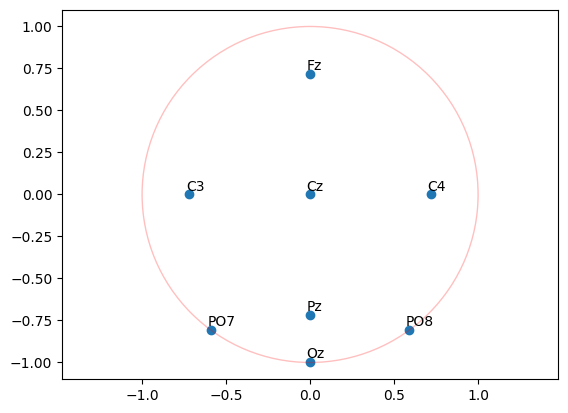

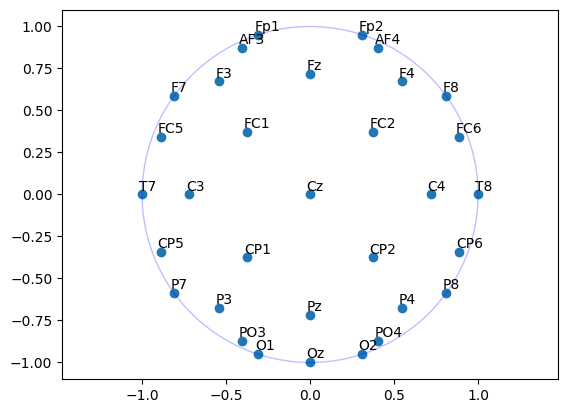

In [5]:
arreglograficas = []

graph8(arreglograficas)

graph32(arreglograficas)

Etapa 2 - Análisis de caminos en los grafos de conectividad

Convierte todos tus grafos no ponderados a grafos ponderados utilizando como pesos las distancias físicas que hay entre electrodos (ver tablas de posiciones 3D).

In [6]:
#Creación de objetos de la clase Grafo
grafo1 = WeightedGraph(directed=False)
grafo2 = WeightedGraph(directed=False)
grafo3 = WeightedGraph(directed=False)
grafo4 = WeightedGraph(directed=False)

#LLamada a la función para llenar los grafos con los datos de las matrices
grafo1.graficasGraph('Operaciones_H.txt', '8elec.txt')
grafo2.graficasGraph('Operaciones_S0A.txt', '32elec.txt')

#Impresión de los grafos, su camino y el peso
grafo1.print_graph
grafo2.print_graph

Fz  ->  Cz  weight:  0.7814625855176945
C3  ->  Cz  weight:  0.7814625855176945
C3  ->  Pz  weight:  1.0173003839574621
C3  ->  PO7  weight:  1.0969805121109717
Cz  ->  Fz  weight:  0.7814625855176945
Cz  ->  C3  weight:  0.7814625855176945
Cz  ->  C4  weight:  0.7814625855176945
Cz  ->  Pz  weight:  0.7814625855176945
C4  ->  Cz  weight:  0.7814625855176945
C4  ->  Pz  weight:  1.0173003839574621
Pz  ->  C3  weight:  1.0173003839574621
Pz  ->  Cz  weight:  0.7814625855176945
Pz  ->  C4  weight:  1.0173003839574621
Pz  ->  PO7  weight:  0.9408923487792055
Pz  ->  Oz  weight:  0.7814619046423504
Pz  ->  PO8  weight:  0.9408923487792055
PO7  ->  C3  weight:  1.0969805121109717
PO7  ->  Pz  weight:  0.9408923487792055
PO7  ->  Oz  weight:  0.617657422863192
Oz  ->  Pz  weight:  0.7814619046423504
Oz  ->  PO7  weight:  0.617657422863192
Oz  ->  PO8  weight:  0.617657422863192
PO8  ->  Pz  weight:  0.9408923487792055
PO8  ->  Oz  weight:  0.617657422863192
Fp2  ->  AF4  weight:  0.334974903

<bound method WeightedGraph.print_graph of <__main__.WeightedGraph object at 0x7f3c8a1553f0>>


Para los grafos obtenidos con el dispositivo Unicorn, utiliza el método de BFS para encontrar caminos entre los siguientes pares de electrodos:

8 Electrodos:
('Fz', 'PO8'), ('C3', 'Oz'), ('PO7', 'C4'), Las dos inventadas por el equipo: ('Cz', 'Oz'), ('C4', 'Fz')

32 Electrodos:
('F7', 'PO4'), ('CP5', 'O2'), ('P4', 'T7'), ('AF3', 'CP6'), ('F8', 'CP2'), Las dos inventadas por el equipo: ('FC1', 'Pz'), ('PO3', 'FC2')



Funciones necesarias para este paso:

In [7]:
from queue import Queue, LifoQueue, PriorityQueue
import numpy as np

def bfs(graph: WeightedGraph, v0, vg):
    if v0 not in graph.vertices():
        print("ALERTA;--- vertex ", v0, " no existe")

    if vg not in graph.vertices():
        print("ALERTA -  vertice ", vg, " no existe")


    frontier = Queue()
    frontier.put(TreeNode(None, v0, 0))

    explored_set = {}

    while True:
        if frontier.empty():
            return None

        node = frontier.get()

        if node.v == vg:
            return {"Path": node.path(), "Cost": node.c}

        # Expandir nodo
        if node.v not in explored_set:
            adjacent_vertices = graph.adjacent_vertices(node.v)
            for vertex in adjacent_vertices:
                frontier.put(TreeNode(node, vertex[0], vertex[1] + node.c))

        explored_set[node.v] = 0


def dfs(graph: WeightedGraph, v0, vg):
    if v0 not in graph.vertices():
        print("ALERTA vertice", v0, " no existe")

    if vg not in graph.vertices():
        print("ALERTA vertice ", vg, " no existe")

    frontier = LifoQueue()
    frontier.put(TreeNode(None, v0, 0))

    explored_set = {}

    while True:
        if frontier.empty():
            return None

        node = frontier.get()

        if node.v == vg:
            return {"Path": node.path(), "Cost": node.c}

        if node.v not in explored_set:
            adjacent_vertices = graph.adjacent_vertices(node.v)
            for vertex in adjacent_vertices:
                frontier.put(TreeNode(node, vertex[0], vertex[1] + node.c))

        explored_set[node.v] = 0


def uniform_cost(graph: WeightedGraph, v0, vg):
    if v0 not in graph.vertices():
        print("ALERTA vertice", v0, " no existe")

    if vg not in graph.vertices():
        print("ALETA vertice ", vg, " no existe")

    frontier = PriorityQueue()
    frontier.put((0, TreeNode(None, v0, 0)))

    explored_set = {}

    while True:
        if frontier.empty():
            return None

        node = frontier.get()[1]

        if node.v == vg:
            return {"Path": node.path(), "Cost": node.c}

        if node.v not in explored_set:
            adjacent_vertices = graph.adjacent_vertices(node.v)
            for vertex in adjacent_vertices:
                cost = vertex[1] + node.c
                frontier.put((cost, TreeNode(node, vertex[0], vertex[1] + node.c)))

        explored_set[node.v] = 0

def dist(xA, yA, zA, xB, yB, zB):
    punto1 = np.array([xA, yA, zA])
    punto2 = np.array([xB, yB, zB])
    dist = np.linalg.norm(punto2 - punto1)
    return dist


def ejecutar_algoritmo(algoritmo, grafica, inicio, destino, graficar):
    print(f"-----{algoritmo.__name__}-----")
    for x in range(len(inicio)):
        print(f"Viaje de {inicio[x]} -> {destino[x]}")
        res = algoritmo(grafica, inicio[x], destino[x])
        if res is not None:
            if graficar == 0:
                graph8(res["Path"])
            else:
                graph32(res["Path"])
        print(res)

def caminosBusquedas(arregloO_D, graficar, grafica=WeightedGraph):
    print("-----Recorridos de grafos-----")

    for algorithm in [bfs, dfs, uniform_cost]:
        ejecutar_algoritmo(algorithm, grafica, [x[0] for x in arregloO_D], [x[1] for x in arregloO_D], graficar)

-----Recorridos de grafos-----
-----bfs-----
Viaje de Fz -> PO8


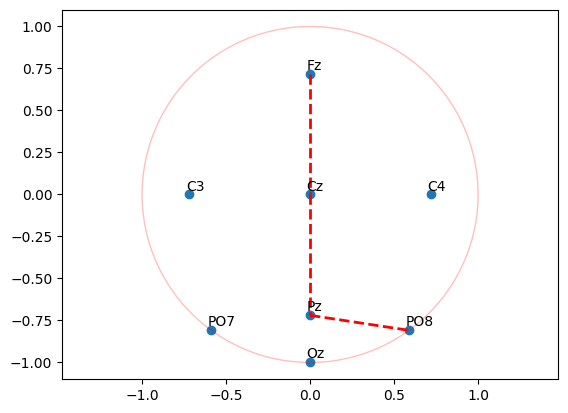

{'Path': ['Fz', 'Cz', 'Pz', 'PO8'], 'Cost': 2.5038175198145947}
Viaje de C3 -> Oz


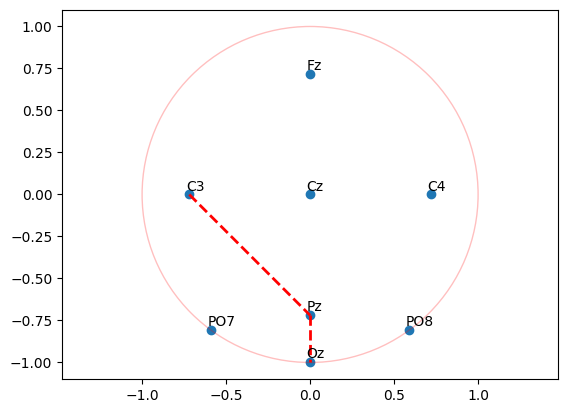

{'Path': ['C3', 'Pz', 'Oz'], 'Cost': 1.7987622885998125}
Viaje de PO7 -> C4


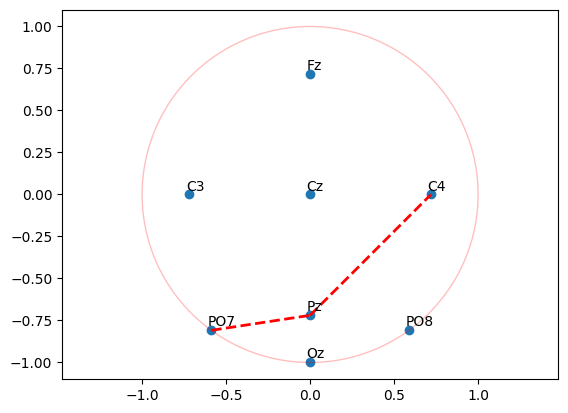

{'Path': ['PO7', 'Pz', 'C4'], 'Cost': 1.9581927327366677}
Viaje de Cz -> Oz


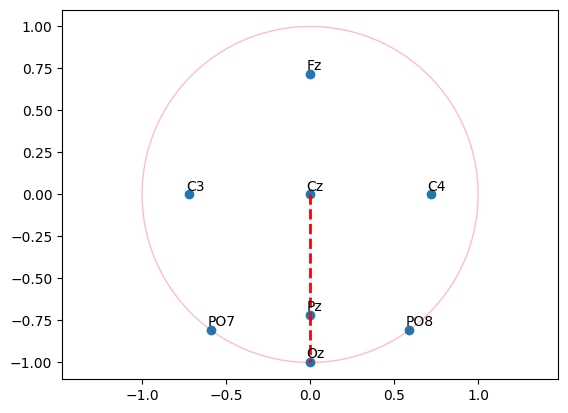

{'Path': ['Cz', 'Pz', 'Oz'], 'Cost': 1.562924490160045}
Viaje de C4 -> Fz


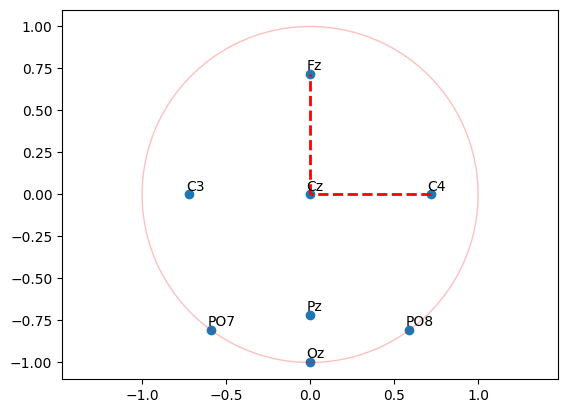

{'Path': ['C4', 'Cz', 'Fz'], 'Cost': 1.562925171035389}
-----dfs-----
Viaje de Fz -> PO8


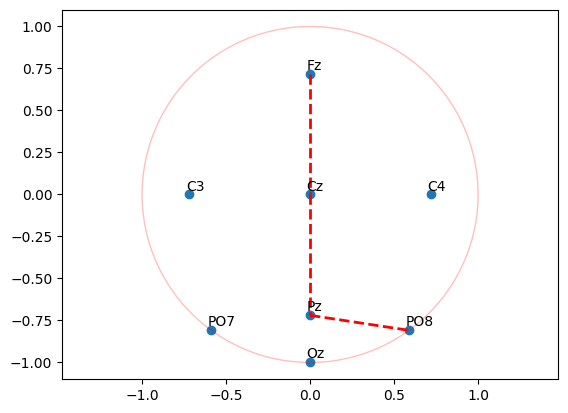

{'Path': ['Fz', 'Cz', 'Pz', 'PO8'], 'Cost': 2.5038175198145947}
Viaje de C3 -> Oz


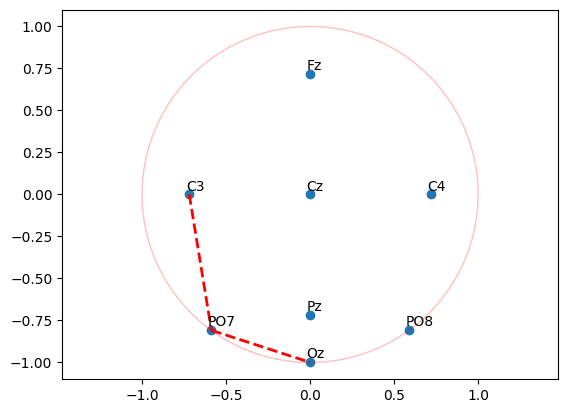

{'Path': ['C3', 'PO7', 'Oz'], 'Cost': 1.7146379349741636}
Viaje de PO7 -> C4


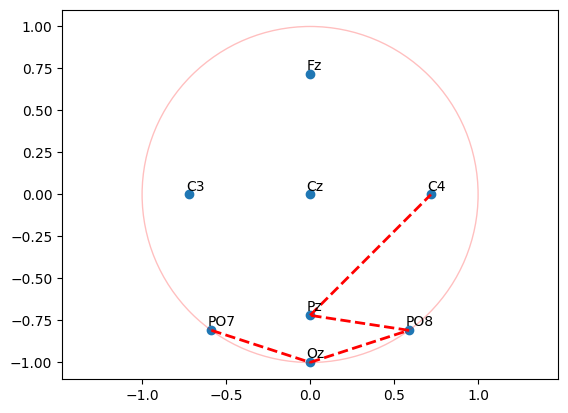

{'Path': ['PO7', 'Oz', 'PO8', 'Pz', 'C4'], 'Cost': 3.193507578463052}
Viaje de Cz -> Oz


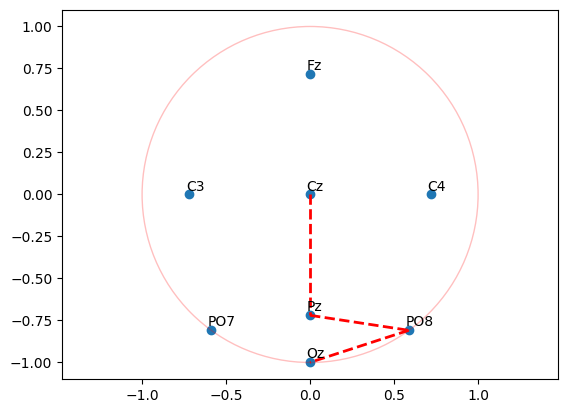

{'Path': ['Cz', 'Pz', 'PO8', 'Oz'], 'Cost': 2.340012357160092}
Viaje de C4 -> Fz


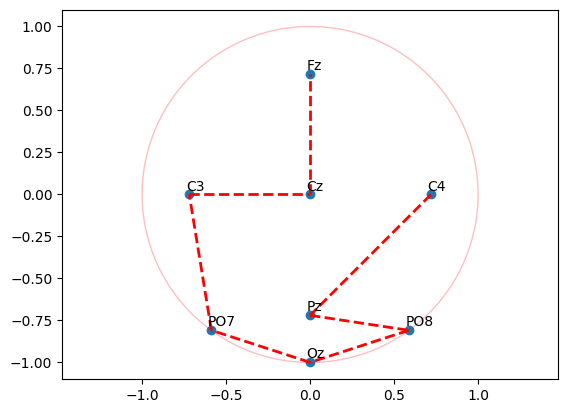

{'Path': ['C4', 'Pz', 'PO8', 'Oz', 'PO7', 'C3', 'Cz', 'Fz'], 'Cost': 5.853413261609411}
-----uniform_cost-----
Viaje de Fz -> PO8


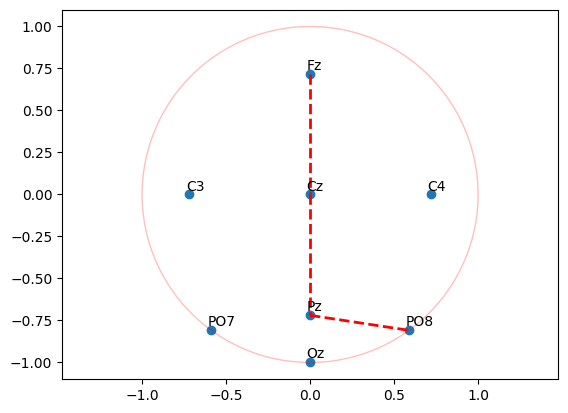

{'Path': ['Fz', 'Cz', 'Pz', 'PO8'], 'Cost': 2.5038175198145947}
Viaje de C3 -> Oz


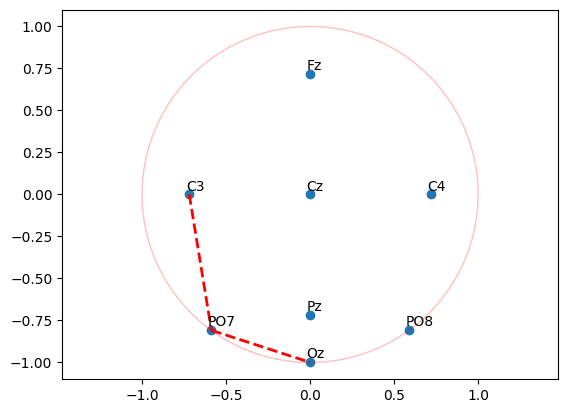

{'Path': ['C3', 'PO7', 'Oz'], 'Cost': 1.7146379349741636}
Viaje de PO7 -> C4


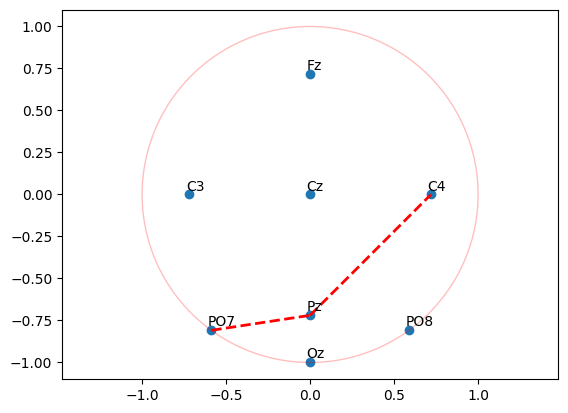

{'Path': ['PO7', 'Pz', 'C4'], 'Cost': 1.9581927327366677}
Viaje de Cz -> Oz


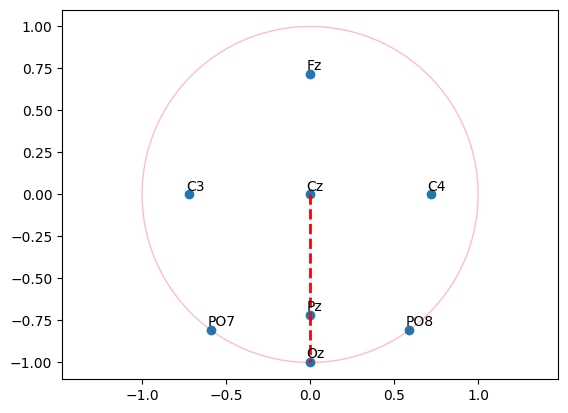

{'Path': ['Cz', 'Pz', 'Oz'], 'Cost': 1.562924490160045}
Viaje de C4 -> Fz


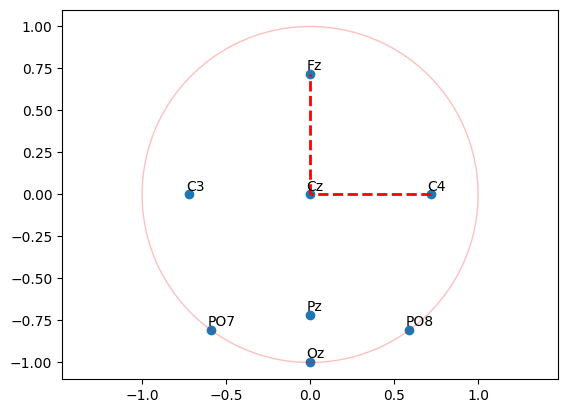

{'Path': ['C4', 'Cz', 'Fz'], 'Cost': 1.562925171035389}
-----Recorridos de grafos-----
-----bfs-----
Viaje de F7 -> PO4
None
Viaje de CP5 -> O2
None
Viaje de P4 -> T7
None
Viaje de AF3 -> CP6


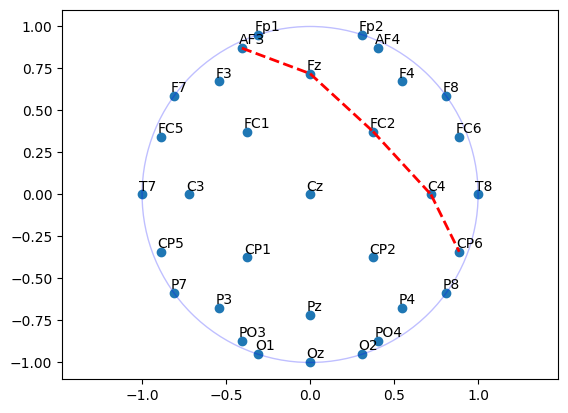

{'Path': ['AF3', 'Fz', 'FC2', 'C4', 'CP6'], 'Cost': 2.208021393484011}
Viaje de F8 -> CP2
None
Viaje de FC1 -> Pz


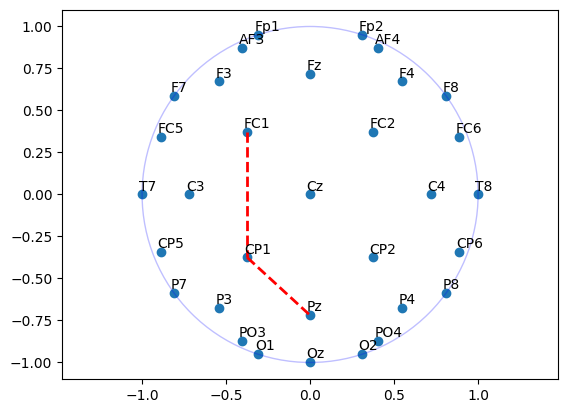

{'Path': ['FC1', 'CP1', 'Pz'], 'Cost': 1.2811209621018191}
Viaje de PO3 -> FC2
None
-----dfs-----
Viaje de F7 -> PO4
None
Viaje de CP5 -> O2
None
Viaje de P4 -> T7
None
Viaje de AF3 -> CP6


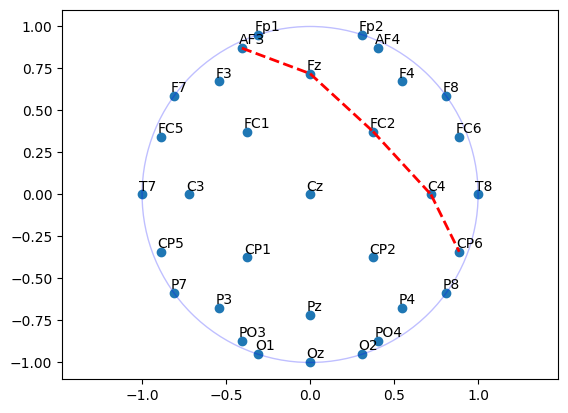

{'Path': ['AF3', 'Fz', 'FC2', 'C4', 'CP6'], 'Cost': 2.208021393484011}
Viaje de F8 -> CP2
None
Viaje de FC1 -> Pz


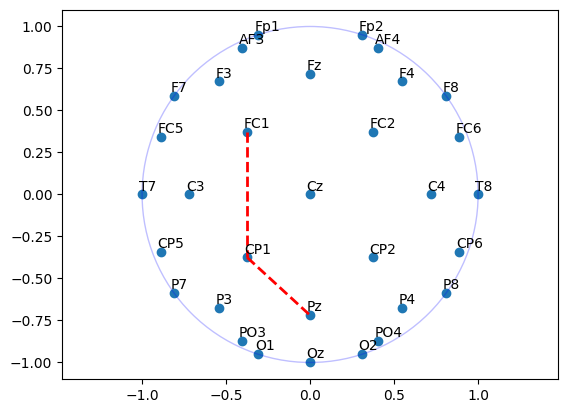

{'Path': ['FC1', 'CP1', 'Pz'], 'Cost': 1.2811209621018191}
Viaje de PO3 -> FC2
None
-----uniform_cost-----
Viaje de F7 -> PO4
None
Viaje de CP5 -> O2
None
Viaje de P4 -> T7
None
Viaje de AF3 -> CP6


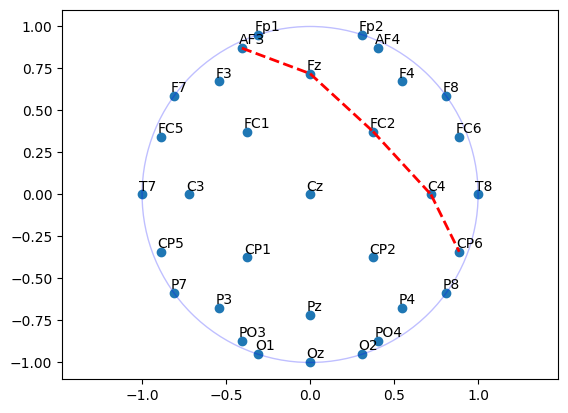

{'Path': ['AF3', 'Fz', 'FC2', 'C4', 'CP6'], 'Cost': 2.208021393484011}
Viaje de F8 -> CP2
None
Viaje de FC1 -> Pz


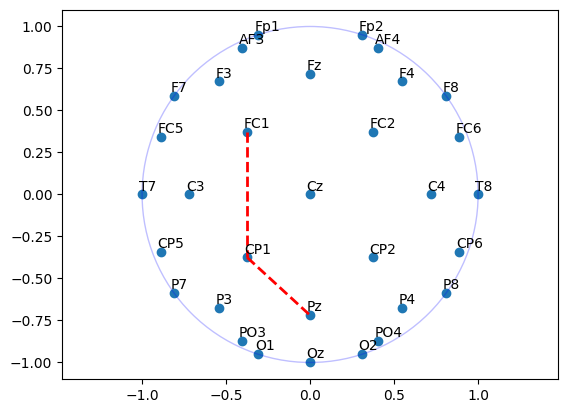

{'Path': ['FC1', 'CP1', 'Pz'], 'Cost': 1.2811209621018191}
Viaje de PO3 -> FC2
None


In [8]:
#Arreglos para llamar a las funciones
#Arreglo para la busqueda de la matriz de 8 electrodos
array8= [('Fz', 'PO8'), ('C3', 'Oz'), ('PO7', 'C4'), ('Cz', 'Oz'), ('C4', 'Fz')]
#Arreglo para la busqueda de la matriz de 32 electrodos
array32 = [('F7', 'PO4'), ('CP5', 'O2'), ('P4', 'T7'), ('AF3', 'CP6'), ('F8', 'CP2'), ('FC1', 'Pz'), ('PO3', 'FC2')]
caminosBusquedas(array8, 0, grafo1)
caminosBusquedas(array32, 1, grafo2)

Utilice el método de Floyd para encontrar las distancias mínimas que hay entre todas las parejas de electrodos para todos los grafos.

Clase para hacer el calculo de Floyd-Warshall

In [9]:
class FloydWarshall:
    @staticmethod
    def shortest_paths(adjacency_matrix):
        BIG_NUMBER = 100000000
        n = len(adjacency_matrix)

        matrix = np.array(adjacency_matrix)
        matrix[matrix == 0] = BIG_NUMBER

        for k in range(n):
            for i in range(n):
                for j in range(n):
                    if matrix[i][k] != BIG_NUMBER and matrix[k][j] != BIG_NUMBER and (matrix[i][k] + matrix[k][j]) < matrix[i][j]:
                        matrix[i][j] = matrix[i][k] + matrix[k][j]

        return matrix

In [10]:
#Creación de 2 objetos de la clase grafos Floyd
grafoFloyd = GraphFloyd(directed=False)
grafoFloyd2 = GraphFloyd(directed=False)

#Llamada a la función graficasGraph para rellenar los 2 grafos (Cambiar los nombres del archivo según sea el caso).
grafoFloyd.graficasGraph('Operaciones_H.txt', '8elec.txt')

grafoFloyd2.graficasGraph('Operaciones_S0A.txt', '32elec.txt')

#Creación de grafo de la clase FloydWarshall
grafoFloydcalc = FloydWarshall()

#Impresión de la matriz de 8 electrodos
print("Distancias mínimas entre todas las parejas de electrodos de matriz 8:")
print(grafoFloydcalc.shortest_paths(grafoFloyd._adjacency_matrix))

#Impresión de la matriz de 32 electrodos
print("Distancias mínimas entre todas las parejas de electrodos de matriz 32:")
print(grafoFloydcalc.shortest_paths(grafoFloyd2._adjacency_matrix))

Fz  ->  Cz  edge weight:  0.7814625855176945
C3  ->  Cz  edge weight:  0.7814625855176945
C3  ->  Pz  edge weight:  1.0173003839574621
C3  ->  PO7  edge weight:  1.0969805121109717
Cz  ->  Fz  edge weight:  0.7814625855176945
Cz  ->  C3  edge weight:  0.7814625855176945
Cz  ->  C4  edge weight:  0.7814625855176945
Cz  ->  Pz  edge weight:  0.7814625855176945
C4  ->  Cz  edge weight:  0.7814625855176945
C4  ->  Pz  edge weight:  1.0173003839574621
Pz  ->  C3  edge weight:  1.0173003839574621
Pz  ->  Cz  edge weight:  0.7814625855176945
Pz  ->  C4  edge weight:  1.0173003839574621
Pz  ->  PO7  edge weight:  0.9408923487792055
Pz  ->  Oz  edge weight:  0.7814619046423504
Pz  ->  PO8  edge weight:  0.9408923487792055
PO7  ->  C3  edge weight:  1.0969805121109717
PO7  ->  Pz  edge weight:  0.9408923487792055
PO7  ->  Oz  edge weight:  0.617657422863192
Oz  ->  Pz  edge weight:  0.7814619046423504
Oz  ->  PO7  edge weight:  0.617657422863192
Oz  ->  PO8  edge weight:  0.617657422863192
PO8  

Etapa 3 - Análisis de árboles de mínima expansión de los grafos de conectividad

Con los grafos de conectividad no ponderados, encuentra los árboles de mínima expansión por el método que gustes que incluyan la mayor cantidad de vértices posibles.

Función para encontrar los árboles de mínima expansión

In [11]:
def prim(start_vertex, graph, new_graph):
    total_cost = 0
    selected_vertices = [start_vertex]
    new_graph.add_vertex(start_vertex)
    remaining_vertices = []

    # Agregar todos los vértices, excepto el inicial, a la lista de vértices restantes
    for vertex in graph.vertices():
        if vertex != start_vertex and len(graph.adjacent_vertices(vertex)) > 0:
            remaining_vertices.append(vertex)

    while remaining_vertices:
        min_cost = float('inf')
        parent_vertex = None
        next_vertex = None

        # Iterar sobre los vértices seleccionados hasta ahora
        for current_vertex in selected_vertices:
            neighbors = graph.adjacent_vertices(current_vertex)

            # Buscar el vértice vecino no seleccionado con el costo mínimo
            for neighbor, cost in neighbors:
                if cost < min_cost and neighbor not in selected_vertices:
                    parent_vertex = current_vertex
                    min_cost = cost
                    next_vertex = neighbor

        # Si no se encuentra un próximo vértice, mostrar mensaje de error y salir
        if next_vertex is None:
            print("No hay solución")
            return None

        # Agregar el próximo vértice y la arista al nuevo grafo
        new_graph.add_vertex(next_vertex)
        new_graph.add_edge(parent_vertex, next_vertex, min_cost)

        # Actualizar las listas de vértices seleccionados y restantes
        selected_vertices.append(next_vertex)
        remaining_vertices.remove(next_vertex)

        # Actualizar el costo total
        total_cost += min_cost

    # Imprimir resultados y devolver la solución
    print("Vértices seleccionados:", selected_vertices)
    print("Costo total:", total_cost)
    return selected_vertices, total_cost


Fz  ->  Cz  weight:  0.7814625855176945
C3  ->  Cz  weight:  0.7814625855176945
C3  ->  Pz  weight:  1.0173003839574621
C3  ->  PO7  weight:  1.0969805121109717
Cz  ->  Fz  weight:  0.7814625855176945
Cz  ->  C3  weight:  0.7814625855176945
Cz  ->  C4  weight:  0.7814625855176945
Cz  ->  Pz  weight:  0.7814625855176945
C4  ->  Cz  weight:  0.7814625855176945
C4  ->  Pz  weight:  1.0173003839574621
Pz  ->  C3  weight:  1.0173003839574621
Pz  ->  Cz  weight:  0.7814625855176945
Pz  ->  C4  weight:  1.0173003839574621
Pz  ->  PO7  weight:  0.9408923487792055
Pz  ->  Oz  weight:  0.7814619046423504
Pz  ->  PO8  weight:  0.9408923487792055
PO7  ->  C3  weight:  1.0969805121109717
PO7  ->  Pz  weight:  0.9408923487792055
PO7  ->  Oz  weight:  0.617657422863192
Oz  ->  Pz  weight:  0.7814619046423504
Oz  ->  PO7  weight:  0.617657422863192
Oz  ->  PO8  weight:  0.617657422863192
PO8  ->  Pz  weight:  0.9408923487792055
PO8  ->  Oz  weight:  0.617657422863192
Fp2  ->  AF4  weight:  0.334974903

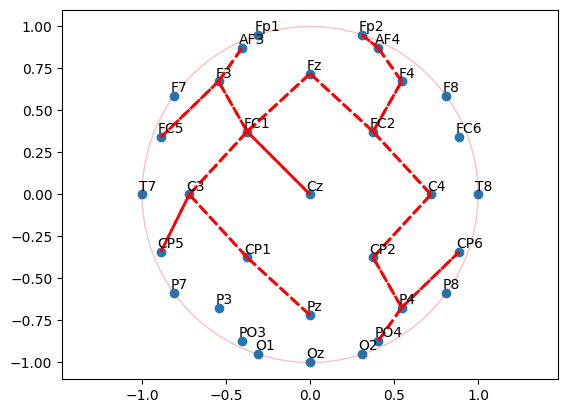

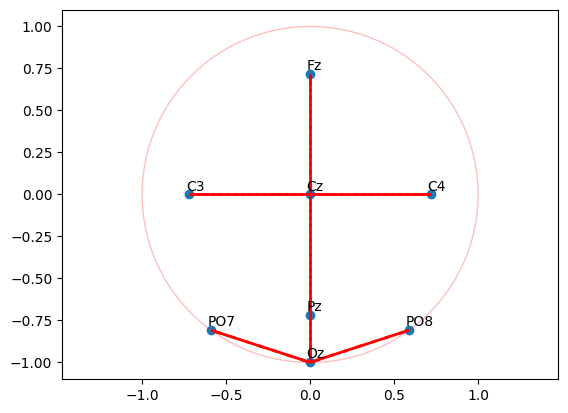

In [12]:
# Crear instancias de WeightedGraph
graph_prim = WeightedGraph(directed=False)
new_graph_prim = WeightedGraph(directed=False)

graph_prim2 = WeightedGraph(directed=False)
new_graph_prim2 = WeightedGraph(directed=False)

# Llenar los grafos desde archivos (Cambiarlos sea el caso.)
graph_prim.graficasGraph('Operaciones_H.txt', '8elec.txt')
graph_prim2.graficasGraph('Operaciones_S0A.txt', '32elec.txt')

# Se aplica el algoritmo de Prim a los grafos
prim('Fz', graph_prim, new_graph_prim)
prim('FC1', graph_prim2, new_graph_prim2)

# Imprimir grafos originales y resultantes
print("Recorridos")
graph_prim.print_graph()

print("Recorrido Prim")
graficarGrafos("32", new_graph_prim2)
graficarGrafos("8", new_graph_prim)

Etapa 4 - Cascos convexos de los vértices de los árboles de mínima expansión

Para los vértices de cada árbol de expansión mínima, encuentra los cascos convexos que envuelven dichos vértices utilizando cualquier técnica que tengas a tu disposición.

Funciones para calcular los cascos convexos y gráficarlos

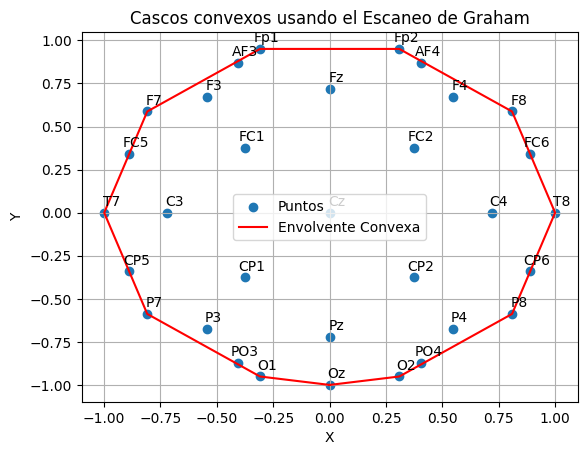

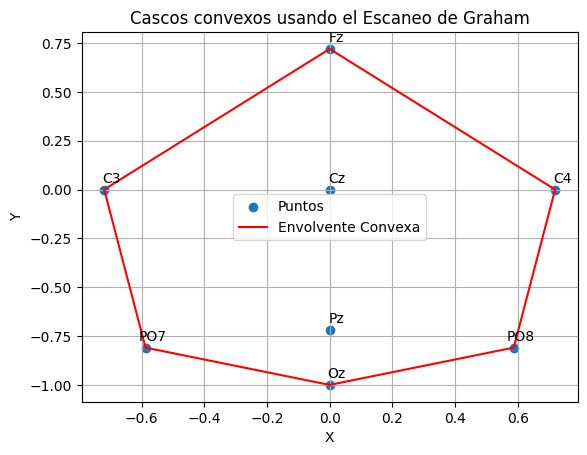

In [13]:
def orientation(p, q, r):
    """
    Determina la orientación entre tres puntos.

    :param p: Primer punto como tupla (x, y).
    :param q: Segundo punto como tupla (x, y).
    :param r: Tercer punto como tupla (x, y).
    :return: 0 si los puntos son colineales, 1 si tienen orientación horaria, 2 si tienen orientación antihoraria.
    """
    val = (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])
    if val == 0:
        return 0
    return 1 if val > 0 else 2

def graham_scan(points):
    """
    Implementación del algoritmo de Graham para encontrar la envolvente convexa de un conjunto de puntos.

    :param points: Lista de puntos representados como tuplas (x, y).
    :return: Lista de puntos que forman la envolvente convexa.
    """
    n = len(points)
    if n < 3:
        return []

    pivot = min(points, key=lambda point: (point[1], point[0]))

    points.sort(key=lambda point: (atan2(point[1] - pivot[1], point[0] - pivot[0]), point))

    hull = [points[0], points[1]]

    for i in range(2, n):
        while len(hull) > 1 and orientation(hull[-2], hull[-1], points[i]) != 2:
            hull.pop()
        hull.append(points[i])

    return hull

def plot_convex_hull(mapatxt, hull):
    """
    Grafica los puntos y la envolvente convexa.

    :param mapatxt: Ruta del archivo de coordenadas.
    :param hull: Lista de puntos que forman la envolvente convexa.
    """
    coordenadas = np.loadtxt(mapatxt, dtype=str)
    x = [float(coordenada[1]) for coordenada in coordenadas]
    y = [float(coordenada[2]) for coordenada in coordenadas]
    vertices = [coordenada[0] for coordenada in coordenadas]

    convex_x, convex_y = zip(*hull)

    plt.scatter(x, y, marker='o', label='Puntos')
    plt.plot(convex_x + (convex_x[0],), convex_y + (convex_y[0],), linestyle='-', color='red', label='Envolvente Convexa')

    for i, vertice in enumerate(vertices):
        plt.annotate(vertice, (x[i], y[i]), textcoords="offset points", xytext=(5,5), ha='center')

    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Cascos convexos usando el Escaneo de Graham')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    mapatxt = "32elec.txt"
    coordenadas = np.loadtxt(mapatxt, dtype=str)
    mapa2txt = "8elec.txt"
    coordenadas2 = np.loadtxt(mapa2txt, dtype=str)

    # Convierte las coordenadas a puntos (x, y)
    puntos = [(float(coordenada[1]), float(coordenada[2])) for coordenada in coordenadas]
    puntos2 = [(float(coordenada2[1]), float(coordenada2[2])) for coordenada2 in coordenadas2]

    # Aplica el algoritmo de Graham para encontrar la envolvente convexa
    convex_hull = graham_scan(puntos)
    convex_hull2 = graham_scan(puntos2)

    # Grafica los puntos y la envolvente convexa
    plot_convex_hull(mapatxt, convex_hull)
    plot_convex_hull(mapa2txt, convex_hull2)

Etapa 5 - Representación del grado de cada arista con diagramas de Voronoi


Función para realizar los calculos voronoi y graficar el diagrama

In [14]:
import matplotlib.colors as mpl_colors
def voronoi(coordenadastxt, gr=WeightedGraph):
    # Cargar las coordenadas y nombres desde el archivo de texto
    coordenadas = np.loadtxt(coordenadastxt, dtype=float, usecols=(1, 2))
    nombres = np.loadtxt(coordenadastxt, dtype=str, usecols=(0))

    # Calcular el número de aristas para cada vértice en el grafo ponderado
    aristas = [len(gr.adjacent_vertices(nombre)) for nombre in nombres]

    # Crear el diagrama de Voronoi usando las coordenadas
    vor = Voronoi(coordenadas)

    # Encontrar el mínimo y máximo número de aristas para la normalización del color
    minima = min(aristas)
    maxima = max(aristas)

    # Crear un mapa de colores y una función de mapeo para la escala de colores
    cmap = cm.get_cmap('inferno_r')
    norm = mpl_colors.Normalize(vmin=minima, vmax=maxima, clip=True)
    mapper = cm.ScalarMappable(norm=norm, cmap=cmap)

    # Crear una figura para el diagrama de Voronoi
    plt.figure(figsize=(8, 8))

    # Dibujar el diagrama de Voronoi con puntos visibles y vértices ocultos
    voronoi_plot_2d(vor, show_points=True, show_vertices=False, s=50, marker='s')

    # Rellenar cada región de Voronoi con un color basado en el número de aristas
    for r in range(len(vor.point_region)):
        region = vor.regions[vor.point_region[r]]
        if not -1 in region:
            polygon = [vor.vertices[i] for i in region]
            # Utilizar el color mapeado para el número de aristas
            plt.fill(*zip(*polygon), color=mapper.to_rgba(aristas[r]), edgecolor='black', linewidth=2)

    plt.xlabel('Coordenada X')
    plt.ylabel('Coordenada Y')
    plt.title('Diagrama de Voronoi Modificado')

    plt.show()

<ipython-input-14-f757ba55d41a>:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('inferno_r')


<Figure size 800x800 with 0 Axes>

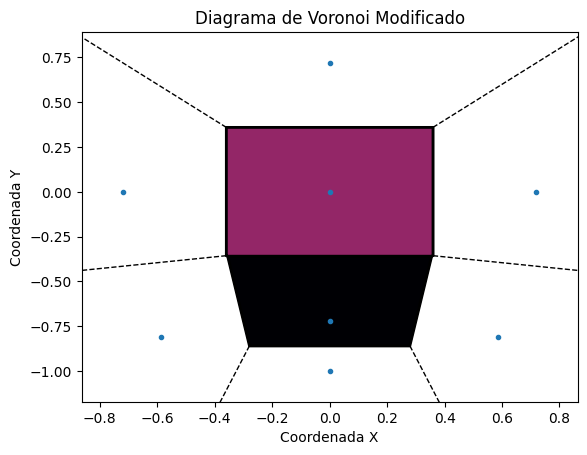

<Figure size 800x800 with 0 Axes>

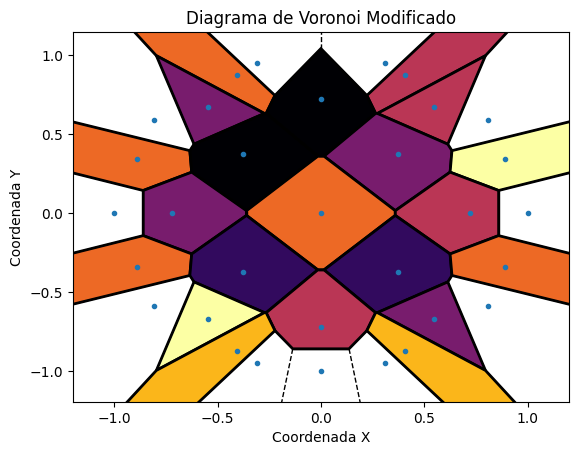

In [15]:
# Llamada para el diagrama de Voronoi de 8 electrodos.
voronoi('8elec.txt', grafo1)

# Llamada para el diagrama de Voronoi de 32 electrodos.
voronoi('32elec.txt', grafo2)